In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("/Users/pranshav/Desktop/psc-innovative/Fake.csv")
true = pd.read_csv("/Users/pranshav/Desktop/psc-innovative/True.csv")

In [3]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'
fake.head()
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [4]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
data.head(5)
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [5]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
# Check the data
data.head()

,title,text,subject,date,target
0,"Mexicans very negative on Trump, but back talk...",MEXICO CITY (Reuters) - An overwhelming majori...,politicsNews,"November 25, 2016",true
1,UK's Farage says PM May might not last until C...,BERLIN (Reuters) - Brexit campaigner Nigel Far...,worldnews,"September 8, 2017",true
2,MIKE HUCKABEE: “Somebody Needs To Go To Prison...,Hey mainstream media when are you going to tak...,politics,"Mar 6, 2017",fake
3,Ammon and Ryan Bundy Found ‘Not Guilty’ in Ore...,"21st Century Wire Yesterday, Judge Anna Brown ...",Middle-east,"October 29, 2016",fake
4,SICK: Republicans Write Letters Supporting Ch...,"Former Speaker of the House Dennis Hastert, wh...",News,"April 23, 2016",fake


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [7]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Mexicans very negative on Trump, but back talk...",MEXICO CITY (Reuters) - An overwhelming majori...,politicsNews,true
1,UK's Farage says PM May might not last until C...,BERLIN (Reuters) - Brexit campaigner Nigel Far...,worldnews,true
2,MIKE HUCKABEE: “Somebody Needs To Go To Prison...,Hey mainstream media when are you going to tak...,politics,fake
3,Ammon and Ryan Bundy Found ‘Not Guilty’ in Ore...,"21st Century Wire Yesterday, Judge Anna Brown ...",Middle-east,fake
4,SICK: Republicans Write Letters Supporting Ch...,"Former Speaker of the House Dennis Hastert, wh...",News,fake


In [8]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,MEXICO CITY (Reuters) - An overwhelming majori...,politicsNews,true
1,BERLIN (Reuters) - Brexit campaigner Nigel Far...,worldnews,true
2,Hey mainstream media when are you going to tak...,politics,fake
3,"21st Century Wire Yesterday, Judge Anna Brown ...",Middle-east,fake
4,"Former Speaker of the House Dennis Hastert, wh...",News,fake


In [9]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,mexico city (reuters) - an overwhelming majori...,politicsNews,true
1,berlin (reuters) - brexit campaigner nigel far...,worldnews,true
2,hey mainstream media when are you going to tak...,politics,fake
3,"21st century wire yesterday, judge anna brown ...",Middle-east,fake
4,"former speaker of the house dennis hastert, wh...",News,fake


In [10]:
# Remove punctuation

import string

def remove_punct(text):
    allchar=list(text)
    clearstr=""
    for i in allchar:
        if(i not in string.punctuation):
            clearstr+=i
    newstr=''.join(clearstr)
    return newstr
    

data['text'] = data['text'].apply(remove_punct)


In [11]:
# Check
data.head()

,text,subject,target
0,mexico city reuters an overwhelming majority ...,politicsNews,true
1,berlin reuters brexit campaigner nigel farage...,worldnews,true
2,hey mainstream media when are you going to tak...,politics,fake
3,21st century wire yesterday judge anna brown h...,Middle-east,fake
4,former speaker of the house dennis hastert who...,News,fake


In [12]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranshav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data.head()

,text,subject,target
0,mexico city reuters overwhelming majority mexi...,politicsNews,true
1,berlin reuters brexit campaigner nigel farage ...,worldnews,true
2,hey mainstream media going take break manufact...,politics,fake
3,21st century wire yesterday judge anna brown h...,Middle-east,fake
4,former speaker house dennis hastert molested c...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


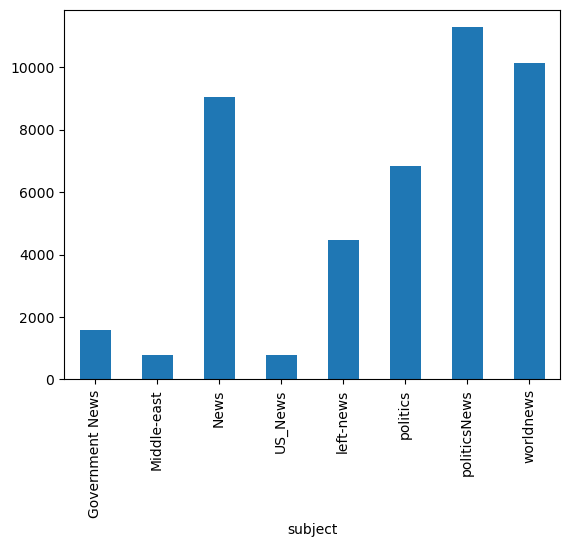

In [14]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


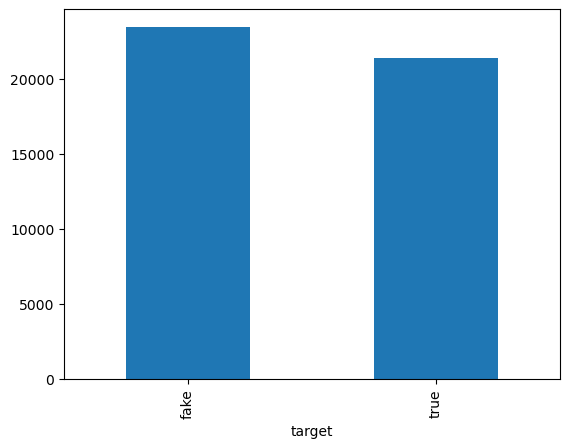

In [15]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [16]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()


In [17]:
# Function to plot the confusion matrix


from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [19]:
x_train.head()

36335    washington reuters facebook inc fbo chief oper...
12384    new york reuters us presidentelect donald trum...
24419    aboard air force one reuters white house wedne...
24740    riga reuters european central bank ratesetter ...
27039    campaign rally cedar rapids iowa republican pr...
Name: text, dtype: object

In [20]:
y_train.head()

36335    true
12384    true
24419    true
24740    true
27039    fake
Name: target, dtype: object

In [21]:
dct={}

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
xv_train=v.fit_transform(x_train)
xv_test=v.transform(x_test)

In [23]:
# print(y_train)
# temp=y_train
# temp=np.where(temp=="fake",0,1)
# print(temp)
print(xv_test)
print(y_test)

  (0, 199315)	0.014242471974951564
  (0, 196478)	0.060534226582108545
  (0, 194535)	0.019763635418839076
  (0, 194327)	0.03508132657758185
  (0, 194099)	0.029781992147347423
  (0, 190162)	0.11574749201700593
  (0, 189313)	0.04259126100396794
  (0, 189004)	0.019682832780570075
  (0, 188929)	0.030672348680545292
  (0, 188024)	0.05825738409399831
  (0, 186093)	0.04716797692092001
  (0, 184895)	0.038714605956807674
  (0, 184076)	0.06365522472259066
  (0, 183600)	0.04860663360671977
  (0, 183197)	0.1771241582598962
  (0, 182710)	0.017764233522407965
  (0, 180893)	0.0326546035082005
  (0, 178553)	0.03835616294763451
  (0, 177118)	0.03774087037209123
  (0, 173471)	0.031928682598854174
  (0, 173400)	0.08751687258400853
  (0, 173390)	0.16763956737003968
  (0, 171626)	0.01898827098605187
  (0, 171471)	0.023094591823754115
  (0, 171304)	0.03707274749451225
  :	:
  (8979, 23868)	0.0690823655466182
  (8979, 23131)	0.032562817952114374
  (8979, 22432)	0.033160741311393946
  (8979, 21688)	0.039163209

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_features=None)
dt.fit(xv_train,y_train)
# Accuracy
prediction = dt.predict(xv_test)
#print(prediction)
dt_score=dt.score(xv_test,y_test)
print(dt_score)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


0.9957683741648107
accuracy: 99.58%


In [25]:
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

Confusion matrix, without normalization


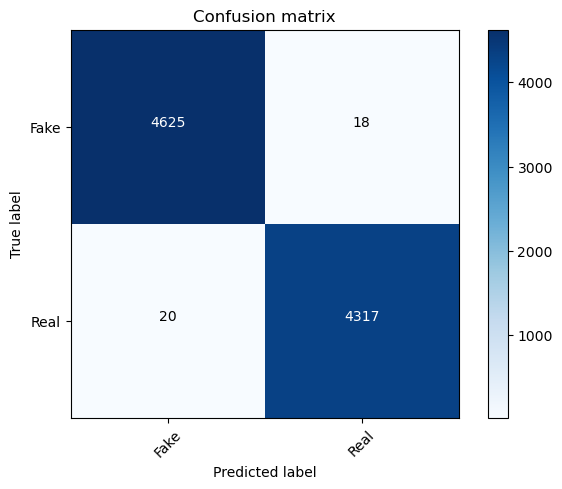

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [27]:
print(y_train)
temp=y_train
temp=np.where(temp=="fake",0,1)
print(temp)


36335    true
12384    true
24419    true
24740    true
27039    fake
         ... 
11284    true
44732    true
38158    true
860      fake
15795    true
Name: target, Length: 35918, dtype: object
[1 1 1 ... 1 0 1]


0.989086859688196
accuracy: 99.58%
Confusion matrix, without normalization


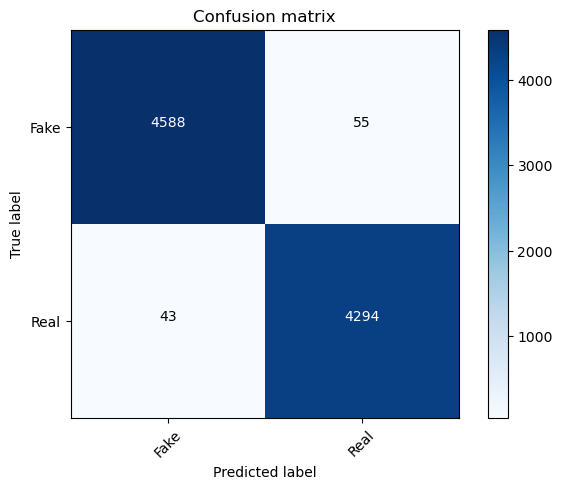

In [28]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr=lr.predict(xv_test)
#print(pred_lr)
lr_score=lr.score(xv_test,y_test)
print(lr_score)
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
#print(classification_report(y_test,pred_lr))

cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

0.9977728285077951
accuracy: 99.78%
Confusion matrix, without normalization


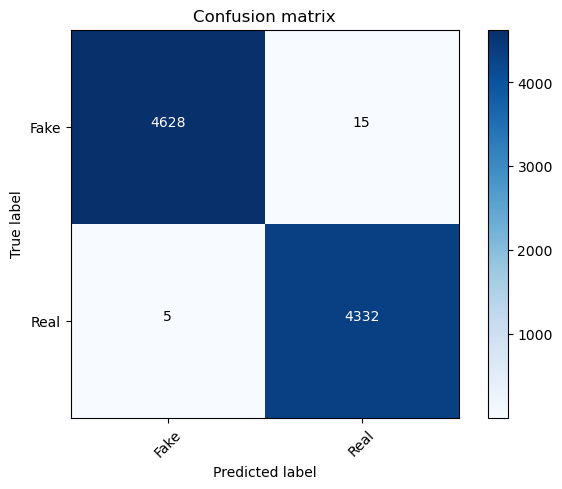

In [29]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# y_train=temp
# np.where(temp=='fake',0,1)
# print(temp)
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(xv_train,temp)
temp2=y_test
temp2=np.where(temp2=="fake",0,1)
my_model_score=my_model.score(xv_test,temp2)
# Predicting the Test set results
y_pred = my_model.predict(xv_test)
print(my_model_score)
dct['XG Boost'] = round(accuracy_score(temp2, y_pred)*100,2)
print("accuracy: {}%".format(round(accuracy_score(temp2, y_pred)*100,2)))

cm = metrics.confusion_matrix(temp2, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

0.9973273942093541
accuracy: 99.73%
Confusion matrix, without normalization


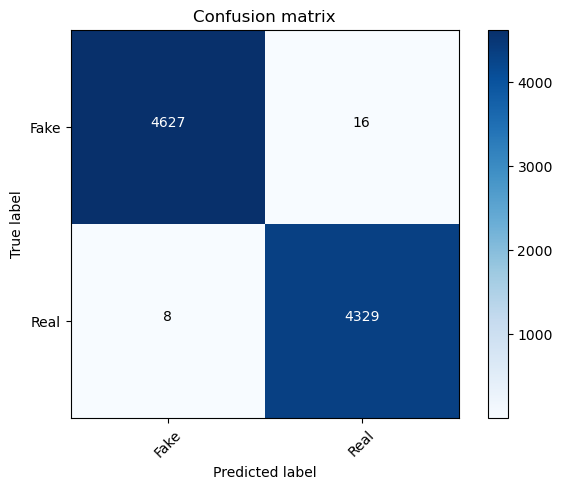

In [30]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

temp=y_train
temp=np.where(temp=="fake",0,1)

rfc = RandomForestClassifier(max_features=None)
rfc.fit(xv_train,temp)
prediction_rfc =rfc.predict(xv_test)
temp2=y_test
temp2=np.where(temp2=="fake",0,1)
rfc_score=rfc.score(xv_test,temp2)
#print(prediction)
print(rfc_score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_rfc)*100,2)))
dct['Random Forest'] = round(accuracy_score(temp2, prediction_rfc)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_rfc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

0.9961024498886414
accuracy: 99.61%
Confusion matrix, without normalization


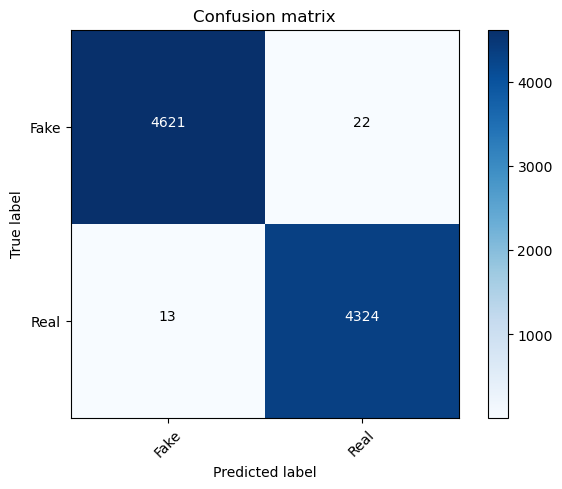

In [31]:
#svm

from sklearn import svm

temp=y_train
temp=np.where(temp=="fake",0,1)

temp2=y_test
temp2=np.where(temp2=="fake",0,1)

sv=svm.SVC(kernel='linear')
sv.fit(xv_train,temp)
prediction_svm=sv.predict(xv_test)
sv_score=sv.score(xv_test,temp2)
print(sv_score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_svm)*100,2)))
dct['SVM'] = round(accuracy_score(temp2, prediction_svm)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_svm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

/Users/pranshav/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


<bound method ClassifierMixin.score of MultinomialNB(alpha=0.0)>
accuracy: 97.64%
Confusion matrix, without normalization


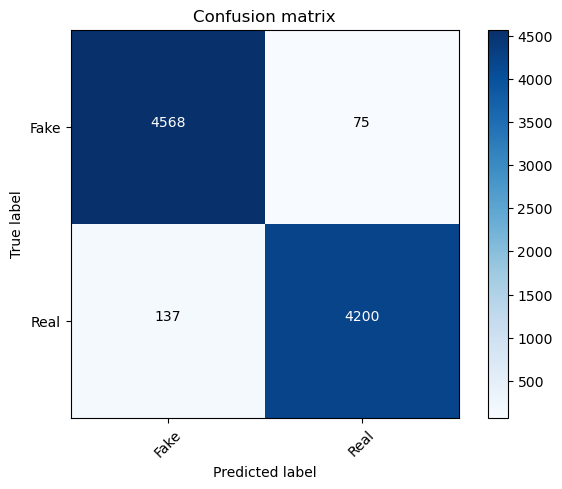

In [32]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

temp=y_train
temp=np.where(temp=="fake",0,1)

nb=MultinomialNB(alpha=0.0)
nb.fit(xv_train,temp)
prediction_nb=nb.predict(xv_test)
#print(prediction_nb)

# print(y_test)
# print(temp)
nb_score=nb.score(xv_test,temp2)
print(nb.score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_nb)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(temp2, prediction_nb)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [33]:
def fake_news(news):
    news=remove_punct(news)
    input_data=[news]
    ser = pd.Series(input_data)
    ser=ser.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    v_inputdata=v.transform(ser)
    #v_inputdata=v.transform(input_data)
    prediction=lr.predict(v_inputdata)
    if(prediction[0]=="true"):
        print("Using Logisitic Regression : {} ".format("TRUE NEWS"))
    else:
        print("Using Logisitic Regression : {} ".format("FAKE NEWS"))
        
    prediction2=dt.predict(v_inputdata)
    if(prediction2[0]=="true"):
        print("Using Decison Tree Classifier : {} ".format("TRUE NEWS"))
    else:
        print("Using Decison Tree Classifier : {} ".format("FAKE NEWS"))
    
    
    prediction3=my_model.predict(v_inputdata)
    if(prediction3==0):
        print("Using Xgboost : {}".format("FAKE NEWS"))
    else:
        print("Using Xgboost : {}".format("TRUE NEWS"))
   
    
    prediction4=sv.predict(v_inputdata)
    if(prediction4==0):
        print("Using SVM : {}".format("FAKE NEWS"))
    else:
        print("Using SVM : {}".format("TRUE NEWS"))
    
    
    prediction5=nb.predict(v_inputdata)
    if(prediction5==0):
        print("Using Naive Bayes : {}".format("FAKE NEWS"))
    else:
        print("Using Naive Bayes : {}".format("TRUE NEWS"))
    
    
    
    prediction6=rfc.predict(v_inputdata)
    if(prediction6==0):
        print("Using Random Forest : {}".format("FAKE NEWS"))
    else:
        print("Using Random Forest : {}".format("TRUE NEWS"))
   
    
    
    
news=input("Enter news: ")
print(" ")
fake_news(news)

Enter news: Rahul Gandhi becomes the President of the United States of America
 
Using Logisitic Regression : FAKE NEWS 
Using Decison Tree Classifier : FAKE NEWS 
Using Xgboost : FAKE NEWS
Using SVM : FAKE NEWS
Using Naive Bayes : TRUE NEWS
Using Random Forest : FAKE NEWS


/var/folders/_9/jw1y4dtj76q3dkbbnyn82pd40000gn/T/ipykernel_51932/3857541561.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


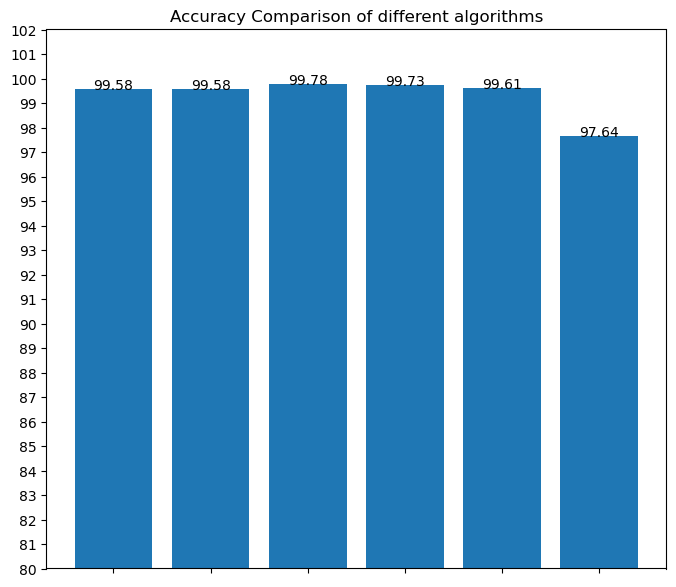

In [34]:
#compare all algos

import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(80,100)
plt.yticks(range(80,103))
ax= plt.subplot()
addlabels(list(dct.keys()),list(dct.values()))
wrap_labels(ax,10)
plt.title("Accuracy Comparison of different algorithms")
plt.show()